In [53]:
# import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [54]:
#import data
df = pd.read_csv("Data/news/bbcamerica.csv")
df.reset_index(inplace=True)

In [117]:
df.head(5)

index start_date    end_date  weekly_subscribers  weekly_views  \
start_date                                                                   
2019-05-30      0 2019-05-30  2019-06-06                1104       1431125   
2019-06-02      1 2019-06-02  2019-06-09                2117       3073578   
2019-06-09      2 2019-06-09  2019-06-16                2053       2743135   
2019-06-16      3 2019-06-16  2019-06-23                2183       2920060   
2019-06-23      4 2019-06-23  2019-06-30                1860       2725790   

            year month  rolling_average  
start_date                               
2019-05-30  2019   May              NaN  
2019-06-02  2019   Jun              NaN  
2019-06-09  2019   Jun              NaN  
2019-06-16  2019   Jun          1864.25  
2019-06-23  2019   Jun          2053.25

In [56]:
# Prepare data Convert into date time 
df.start_date = pd.to_datetime(df.start_date)
df['year'] = [d.year for d in df.start_date]
df['month'] = [d.strftime('%b') for d in df.start_date]
years = df['year'].unique()

In [91]:
df = df.set_index(pd.DatetimeIndex(df['start_date']))

In [153]:
#Normalize the data set
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# copy the data
df_sklearn = df.copy()

# apply normalization techniques
column = 'weekly_subscribers'
df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))
column = 'weekly_views'
df_sklearn[column] = MinMaxScaler().fit_transform(np.array(df_sklearn[column]).reshape(-1,1))

# view normalized data
display(df_sklearn)

index start_date    end_date  weekly_subscribers  weekly_views  \
start_date                                                                   
2019-05-30      0 2019-05-30  2019-06-06              0.1104      0.320459   
2019-06-02      1 2019-06-02  2019-06-09              0.2117      0.717775   
2019-06-09      2 2019-06-09  2019-06-16              0.2053      0.637839   
2019-06-16      3 2019-06-16  2019-06-23              0.2183      0.680638   
2019-06-23      4 2019-06-23  2019-06-30              0.1860      0.633643   
...           ...        ...         ...                 ...           ...   
2022-04-10    150 2022-04-10  2022-04-17              0.0000      0.013490   
2022-04-17    151 2022-04-17  2022-04-24              0.0000      0.009272   
2022-05-01    152 2022-05-01  2022-05-08              0.0000      0.001072   
2022-05-08    153 2022-05-08  2022-05-15              0.0000      0.005286   
2022-05-15    154 2022-05-15  2022-05-22              0.0000      0.000000   

            year month  rolling_average  
start_date                               
2019-05-30  2019   May              NaN  
2019-06-02  2019   Jun              NaN  
2019-06-09  2019   Jun              NaN  
2019-06-16  2019   Jun          1864.25  
2019-06-23  2019   Jun          2053.25  
...          ...   ...              ...  
2022-04-10  2019   Apr          2500.00  
2022-04-17  2019   Apr             0.00  
2022-05-01  2019   May             0.00  
2022-05-08  2019   May             0.00  
2022-05-15  2019   May             0.00  

[155 rows x 8 columns]

In [114]:
df['weekly_subscribers'].sum()

258659

In [125]:
# yearly sum of Subscribers
result = df.groupby(df.index.to_period("Y"))['weekly_subscribers'].sum()

for year, records in result.items():
    print(f"Total Subscriber in {year} = {records}")

Total Subscriber in 2019 = 57659
Total Subscriber in 2020 = 101000
Total Subscriber in 2021 = 90000
Total Subscriber in 2022 = 10000


In [147]:
# yearly/monthly comparison of views of youtube channel
result = df.groupby(df.index.to_period("M"))['weekly_views'].sum()

for year, records in result.items():
    print(f"Total Views in {year} = {records}")

Total Views in 2019-05 = 1431125
Total Views in 2019-06 = 14533887
Total Views in 2019-07 = 10360620
Total Views in 2019-08 = 11162651
Total Views in 2019-09 = 12299070
Total Views in 2019-10 = 9609116
Total Views in 2019-11 = 8270777
Total Views in 2019-12 = 13198027
Total Views in 2020-01 = 8367810
Total Views in 2020-02 = 9967630
Total Views in 2020-03 = 11044889
Total Views in 2020-04 = 12272084
Total Views in 2020-05 = 10107213
Total Views in 2020-06 = 7972404
Total Views in 2020-07 = 7343975
Total Views in 2020-08 = 11873970
Total Views in 2020-09 = 11004395
Total Views in 2020-10 = 10682350
Total Views in 2020-11 = 19729095
Total Views in 2020-12 = 13204308
Total Views in 2021-01 = 14432443
Total Views in 2021-02 = 8382371
Total Views in 2021-03 = 8703015
Total Views in 2021-04 = 12384295
Total Views in 2021-05 = 8914501
Total Views in 2021-06 = 5869065
Total Views in 2021-07 = 6002559
Total Views in 2021-08 = 8368982
Total Views in 2021-09 = 7098243
Total Views in 2021-10 = 762

<AxesSubplot:xlabel='start_date'>

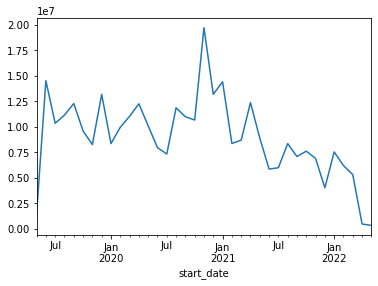

In [146]:
result.plot()

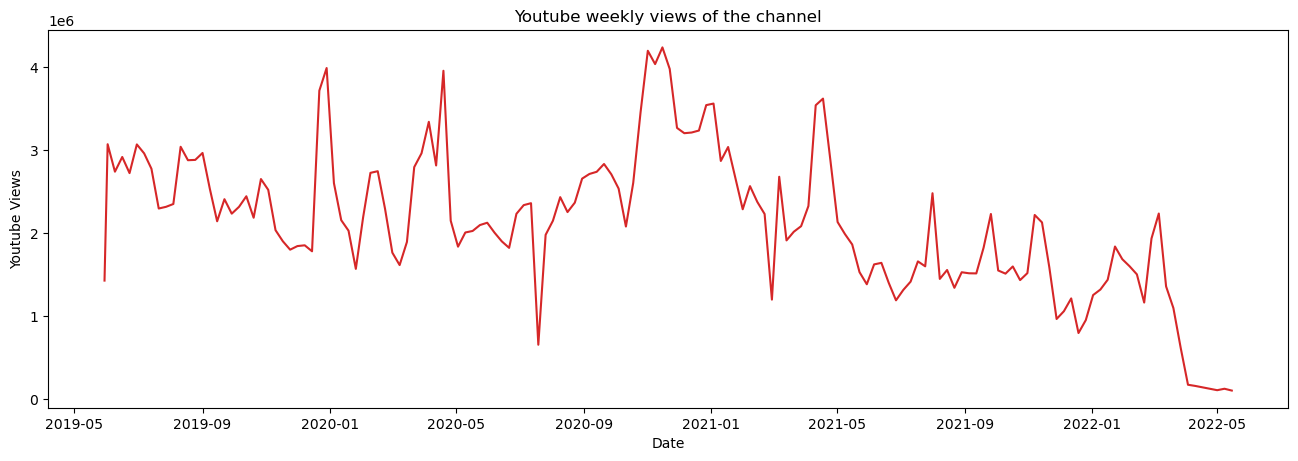

In [57]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.start_date, y=df.weekly_views, ylabel = 'Youtube Views', title='Youtube weekly views of the channel')  

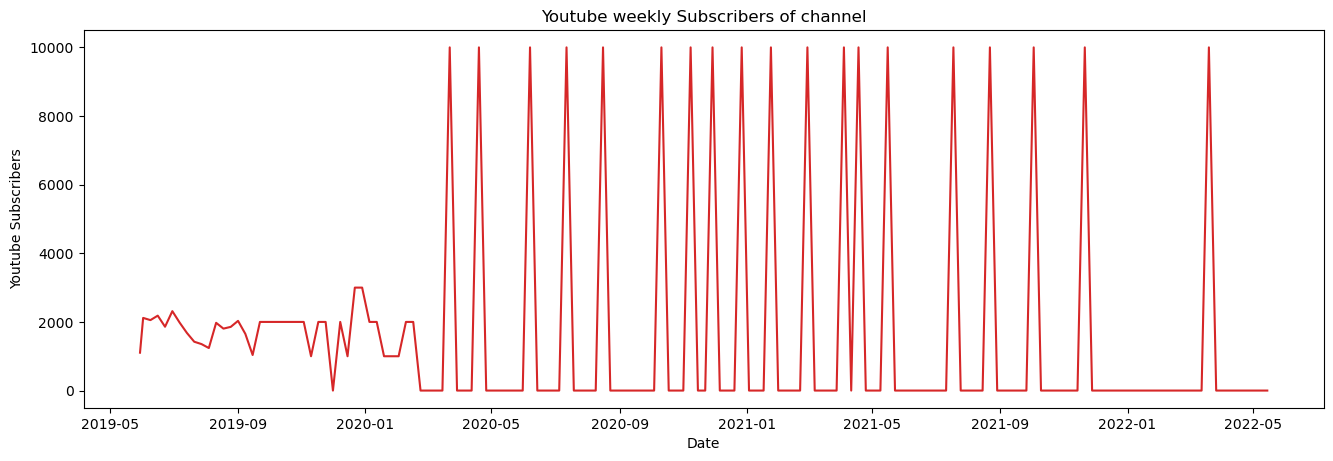

In [59]:
plot_df(df, x=df.start_date, y=df.weekly_subscribers, ylabel = 'Youtube Subscribers',title='Youtube weekly Subscribers of channel')


In [60]:
#plotting data with rolling average
df['rolling_average']=df.weekly_subscribers.rolling(4).mean()

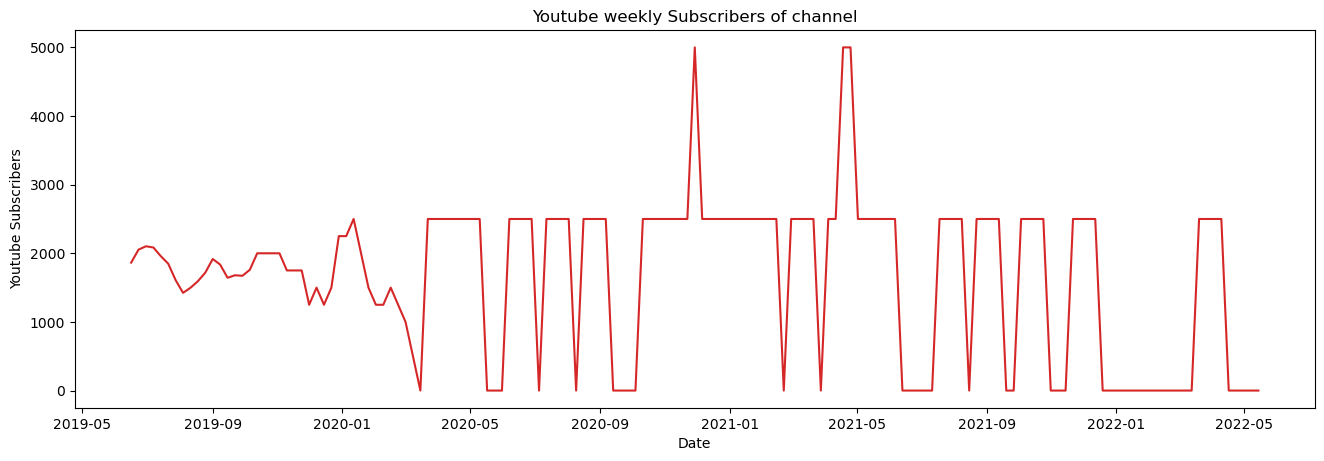

In [61]:
plot_df(df, x=df.start_date, y=df.rolling_average, ylabel = 'Youtube Subscribers',title='Youtube weekly Subscribers of channel')


C:\Users\furqa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\furqa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\furqa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Youtube Subscribers')

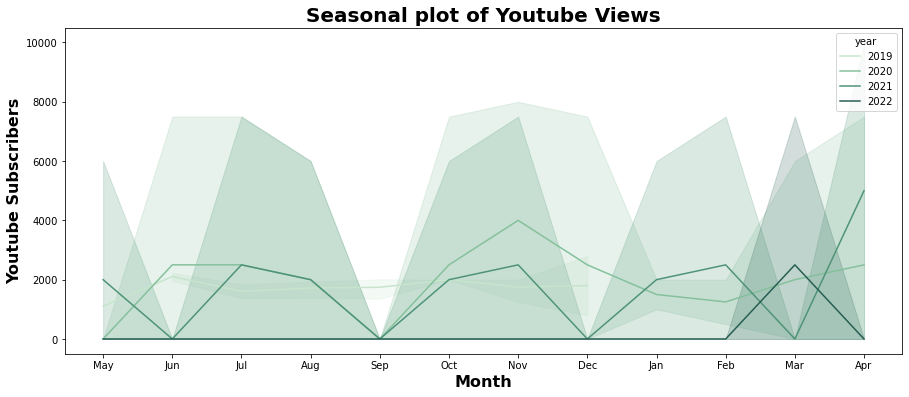

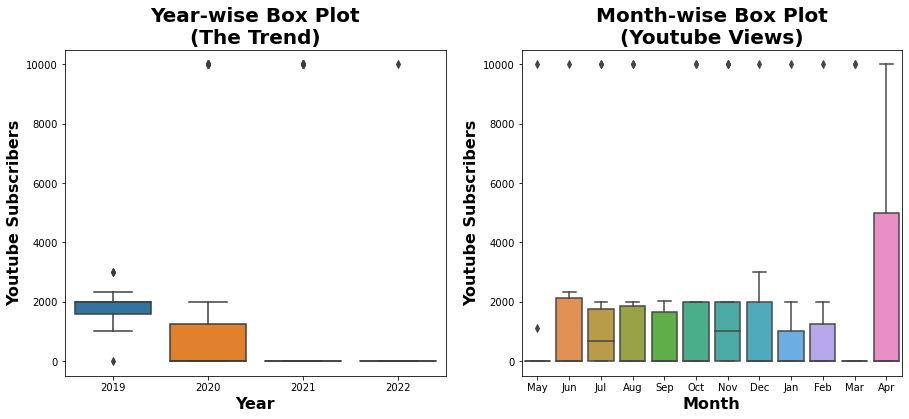

In [64]:
# Seasonal plot for all the years
variable = 'weekly_subscribers'
fig, ax = plt.subplots(figsize=(15, 6))

palette = sns.color_palette("ch:2.5,-.2,dark=.3", 4)
sns.lineplot(df['month'], df[variable], hue=df['year'], palette=palette)
ax.set_title('Seasonal plot of Youtube Views', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Youtube Subscribers', fontsize = 16, fontdict=dict(weight='bold'))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(df['year'], df[variable], ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('Youtube Subscribers', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(df['month'], df[variable], ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(Youtube Views)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('Youtube Subscribers', fontsize = 16, fontdict=dict(weight='bold'))

In [ ]:
y = data[data['obs_id']==2][['year_month','temperatureSurface']]
y = y.set_index('year_month')

from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition', fontsize=22)
view rawtime-series-decomposition.py hosted with ❤ by GitHub

In [85]:
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap

all_days = pd.date_range('1/15/2014', periods=700, freq='D')
days = np.random.choice(all_days, 500)
events = pd.Series(np.random.randn(len(days)), index=days)

(<Figure size 1080x432 with 4 Axes>,
 array([<AxesSubplot:ylabel='2019'>, <AxesSubplot:ylabel='2020'>,
        <AxesSubplot:ylabel='2021'>, <AxesSubplot:ylabel='2022'>],
       dtype=object))

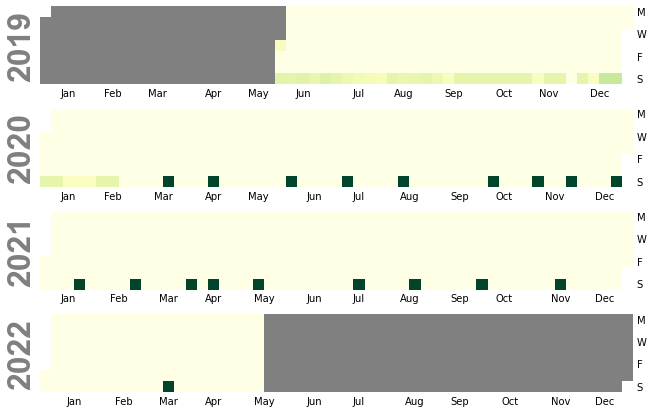

In [112]:
calmap.calendarplot(df.weekly_subscribers, monthticks=10, daylabels='MTWTFSS',
                    dayticks=[0,2,4,6], cmap='YlGn',
                    fillcolor='grey', linewidth=0,
                    fig_kws=dict(figsize=(15, 6)))